# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [3]:
!pip install pandas==0.23

pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
pd.__version__

'0.23.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [6]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [8]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [9]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [10]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [11]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [12]:
len(movies)

244914

### List all Batman movies ever made

In [13]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [14]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [15]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [16]:
harrypotter_df = movies[movies.title.str.contains('harry potter', case=False)]
print("total harry potter movies:", len(harrypotter_df))
harrypotter_df.sort_values(by = 'year', ascending = False)

total harry potter movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [17]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [18]:
print("total movies made in 2015: ", len(movies[movies.year == 2015]))

total movies made in 2015:  8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [19]:
print("total movies made from 2000 to 2018: ", len(movies[(movies.year >= 2000) & (movies.year <= 2018)]))

total movies made from 2000 to 2018:  114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [20]:
ham_df = movies[movies['title'] == 'Hamlet']
print("total movies named hamlet: ", len(ham_df))

ham_str_df = movies[movies.title.str.contains('Hamlet')]
print("total movies with name hamlet in them: ", len(ham_str_df))

total movies named hamlet:  20
total movies with name hamlet in them:  57


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [21]:
hamlet_df = movies[(movies.title.str.contains('Hamlet')) & (movies.year >= 2000)].sort_values(by=['year'])
hamlet_df

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [83]:
# using isna() to determine if the value is NaN or not

inception_sa_df = cast[(cast['title'] == 'Inception') & (cast['n'].isna())]
print("number of supporting actors in inception cast: ", len(inception_sa_df))

number of supporting actors in inception cast:  27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [84]:
# using notna() to detrermine if the value is NaN or not

inception_mc_df = cast[(cast['title'] == 'Inception') & (cast['n'].notna())]
print("number of main actors in inception cast: ", len(inception_mc_df))

number of main actors in inception cast:  51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [85]:
inception_mc_df.sort_values(by = 'n').head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [92]:
def find_character(c):
    return (cast[cast.character.str.contains(c)])

print("movies with character 'Albus Dumbledore':\n\n", find_character('Albus Dumbledore')['title'])

movies with character 'Albus Dumbledore':

 704984                                       Epic Movie
792419     Harry Potter and the Deathly Hallows: Part 1
792420     Harry Potter and the Deathly Hallows: Part 2
792421              Harry Potter and the Goblet of Fire
792422           Harry Potter and the Half-Blood Prince
792423        Harry Potter and the Order of the Phoenix
792424         Harry Potter and the Prisoner of Azkaban
947789          Harry Potter and the Chamber of Secrets
947790            Harry Potter and the Sorcerer's Stone
1685537                           Ultimate Hero Project
1893421    Harry Potter and the Deathly Hallows: Part 1
2248085                                          Potter
Name: title, dtype: object


In [87]:
print("Names of character 'Albus Dumbledore':\n\n", find_character('Albus Dumbledore')['name'].unique())

Names of character 'Albus Dumbledore':

 ['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Toby Regbo' 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [93]:
def find_actor(c):
    return (cast[cast['name'] == c])

keanu_reeves_characters = find_actor('Keanu Reeves')['character'].unique()

print("Characters played by Keanu Reeves are: ", len(keanu_reeves_characters), '\n', keanu_reeves_characters )

Characters played by Keanu Reeves are:  56 
 ['Kai' 'Bob Arctor' 'Paul Sutton' 'Ted' 'Eddie Kasalivich'
 'John Constantine' 'Chevalier Danceny' 'Jonathan Harker' 'Dogstar'
 'Julian Gitche' 'Detective Galban' 'Jjaks Clayton' 'Tommy Warneki'
 'Ortiz the Dog Boy' 'John' "Conor O'Neill" 'Henry Torne' 'Marlon'
 'John Wick' 'Johnny Mnemonic' 'Keanu' 'Evan' 'Siddhartha' 'Donaka Mark'
 'Himself' 'Don John' 'Scott Favor' 'Ron Petrie' 'Tod' 'Chris Townsend'
 'Johnny Utah' 'Matt' 'Lucas Hill' 'Julian Mercer' 'Jack Traven'
 'Keanu Reeves' 'Detective Tom Ludlow' 'Nelson Moss' 'The Dream' 'Klaatu'
 'Kevin Lomax' 'Donnie Barksdale' 'Alex Wyler' 'Harry' 'Neo' 'Hank'
 'Winston Connelly' 'Rupert Marshetta' 'Chris Nadeau' 'Shane Falco'
 'Griffin' 'Ramsey' 'Perry Lyman' 'Dr. Beckham' 'Martin Loader' 'Heaver']


In [94]:
keanu_df = find_actor('Keanu Reeves')

# assuming that column 'n' = 1 shows that the role is leading

show_character = keanu_df[(keanu_df.year >= 1999) & (keanu_df.n == 1) ].sort_values(by=['year'])
print("leading roles that 'Keanu Reeves' played on or after 1999 in order by year\n")
show_character[['year', 'character']]

leading roles that 'Keanu Reeves' played on or after 1999 in order by year



,year,character
1892390,1999,Neo
1892397,2000,Shane Falco
1892358,2001,Conor O'Neill
1892383,2001,Nelson Moss
1892348,2005,John Constantine
1892388,2006,Alex Wyler
1892382,2008,Detective Tom Ludlow
1892385,2008,Klaatu
1892359,2010,Henry Torne
1892342,2013,Kai


In [95]:
# some of the movies where Keanu Reeves was leading role but there is ERROR in the data
keanu_df[(keanu_df.year >= 1999) & (keanu_df.n.isna())]

,title,year,name,type,character,n
1892357,Generation Um...,2012,Keanu Reeves,actor,John,NaN
1892363,John Wick: Chapter 3,2019,Keanu Reeves,actor,John Wick,NaN
1892381,SPF-18,2017,Keanu Reeves,actor,Keanu Reeves,NaN


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [96]:
def roles_from_year(starting_year, ending_year):
    return cast[(cast.year >= starting_year) & (cast.year <= ending_year)].sort_values(by=['year'])

print("total number of actor and actress roles available from 1950 - 1960 is:  ", len(roles_from_year(1950, 1960)))
roles_from_year(1950, 1960).head()

total number of actor and actress roles available from 1950 - 1960 is:   234635


,title,year,name,type,character,n
3786094,Akdeniz korsanlari,1950,Muazzez ?lkerer,actress,Maria,2.0
3196093,Copper Canyon,1950,Joanne Linville,actress,Showgirl,NaN
960296,Die Kreuzlschreiber,1950,Ullrich (II) Haupt,actor,Bauernbursche,NaN
960306,Mister 880,1950,Whitey Haupt,actor,Boy,NaN
960509,Der Dorfmonarch,1950,Heinrich Hauser,actor,Wastl,12.0


In [97]:
print("total number of actor and actress roles available from 2007 - 2017 is:  ", len(roles_from_year(2007, 2017)))
roles_from_year(2007, 2017).head()

total number of actor and actress roles available from 2007 - 2017 is:   1452413


,title,year,name,type,character,n
3267135,The Nines,2007,Melissa McCarthy,actress,Mary,2.0
784234,The Black Pimpernel,2007,Jorge Gaete,actor,Embassy Official,NaN
2845336,The Gene Generation,2007,Faye Dunaway,actress,Josephine Hayden,4.0
325282,Enfin veuve,2007,Julien Cafaro,actor,Pierrot,13.0
325278,Return of the Ghostbusters,2007,Anthony Cafaro,actor,Additional appearance,85.0


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [98]:
roles = roles_from_year(2000, 2020)
leading_roles = roles[roles.n == 1]
print("number of leading roles available from 2000 to present: ", len(leading_roles))
leading_roles.head()

number of leading roles available from 2000 to present:  60568


,title,year,name,type,character,n
2518632,Sauve-moi,2000,Roschdy Zem,actor,Mehdi,1.0
163646,Lion of Oz,2000,Henry Beckman,actor,Narrator,1.0
2513395,Angels!,2000,Ruben Zambrano,actor,Coty Dominguez,1.0
2515001,Zycie jako smiertelna choroba przenoszona drog...,2000,Zbigniew Zapasiewicz,actor,Tomasz Berg,1.0
2525202,Senke uspomena,2000,Velimir 'Bata' Zivojinovic,actor,Ljuba Radovanovic,1.0


In [99]:
non_leading_roles = roles[(roles.n != 1) & (roles.n.notna())]
print("number of non-leading roles available from 2000 to present: ", len(non_leading_roles))
non_leading_roles.head()

number of non-leading roles available from 2000 to present:  1001710


,title,year,name,type,character,n
2516356,DMB,2000,Andrey Zashcholkin,actor,Taxi Driver,58.0
2516358,Red Lipstick,2000,Derek Zasky,actor,Chad,27.0
2516371,Addicted to Murder 3: Blood Lust,2000,Joe Zaso,actor,Dan,6.0
762479,The Drop,2000,Edmond Frankel,actor,Big Joe's Man,14.0
2516467,Faith and the Water Dog,2000,Oleg Zatsepin,actor,Man 3,5.0


In [100]:
support_roles = roles[roles.n.isna()]
print("number of support/extra roles available from 2000 to present: ", len(support_roles))
support_roles.head()

number of support/extra roles available from 2000 to present:  887404


,title,year,name,type,character,n
433861,Elle ou lui,2000,Benoit Clerc,actor,Benoit,NaN
2516761,Egoisci,2000,Daniel Zawadzki,actor,Soldier,NaN
762734,My Next Funeral,2000,Alfred Franklin,actor,Rabbi,NaN
2515885,Strippers,2000,Gregory Zarian,actor,Boyfriend,NaN
163221,Eternal Embrace,2000,Andreas Beckett,actor,Lover,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [101]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
The Outsider            12
Temptation              12
Freedom                 11
Othello                 11
The Three Musketeers    11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

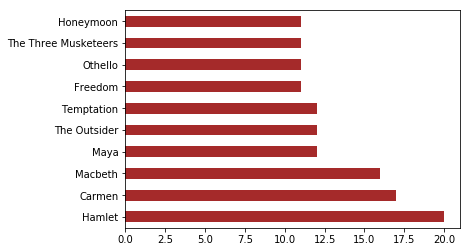

In [104]:
top_ten.plot(kind='barh', color = 'brown')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [103]:
most_movies = movies[movies.year >= 2000]
print("year    count")
most_movies.year.value_counts()[:3]

year    count


2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

    year  No of movies
0   1890             3
1   1900            39
2   1910          6799
3   1920          9034
4   1930         10388
5   1940          8718
6   1950         12934
7   1960         17976
8   1970         19526
9   1980         21034
10  1990         22992
11  2000         39452
12  2010         75733
13  2020           285


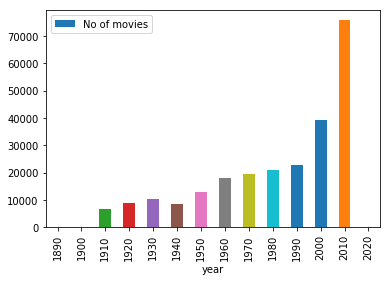

In [105]:
# removing the error from the data set i-e year 2115
m = movies.drop(movies['year'].idxmax())

movies_decades = m.groupby((movies['year']/10).astype(int)*10).size().reset_index(name='No of movies')

print(movies_decades)
movies_decades.plot(kind = 'bar', x = 'year', y ='No of movies')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [106]:
print('top 10 most common character names in movie history: ')
cast.character.value_counts()[:10]

top 10 most common character names in movie history: 


Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [107]:
print("top 10 people most often credited as 'Herself' in movie history")
herself_characters = cast[cast.character == 'Herself']
herself_characters['name'].value_counts()[:10]

top 10 people most often credited as 'Herself' in movie history


Queen Elizabeth II        12
Mar?a Luisa (V) Mart?n     9
Joyce Brothers             9
Luisa Horga                9
Hillary Clinton            8
Margaret Thatcher          8
Joan Rivers                6
Oprah Winfrey              6
In?s J. Southern           6
Sumie Sakai                6
Name: name, dtype: int64

In [108]:
print("top 10 people most often credited as 'Himself' in movie history")
himself_characters = cast[cast.character == 'Himself']
himself_characters['name'].value_counts()[:10]

top 10 people most often credited as 'Himself' in movie history


Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [109]:
def role_names (n):
    return cast[cast.character.str.startswith(n)]

print('top 10 most frequent roles that start with the word "Zombie": ')
zombie_df = role_names('Zombie')
zombie_df['character'].value_counts()[:10]

top 10 most frequent roles that start with the word "Zombie": 


Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [110]:
print('top 10 most frequent roles that start with the word "Police": ')
police_df = role_names('Police')
police_df['character'].value_counts()[:10]

top 10 most frequent roles that start with the word "Police": 


Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [50]:
keanu_roles_df = cast[cast.name == 'Keanu Reeves']
keanu_roles_df.year.value_counts().reset_index(name = 'count')

,index,count
0,2016,5
1,1988,4
2,1993,4
3,2003,3
4,2017,3
5,1986,3
6,1999,3
7,1991,3
8,2000,3
9,2005,3


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


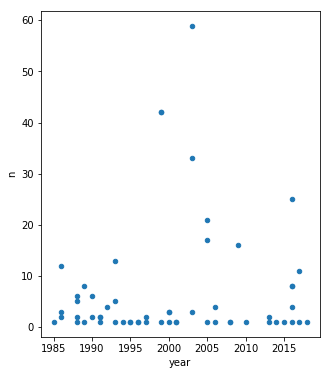

In [73]:
keanu_roles_df[['year' , 'n']].plot(x ='year', y='n', kind = 'scatter',figsize=(5 , 6))

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

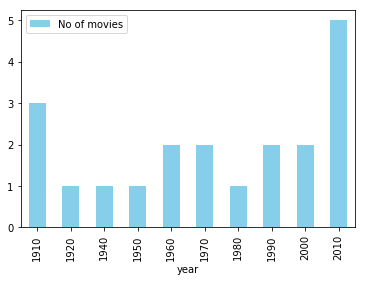

In [81]:
# Using dataset of movies named ony 'Hamlet'

hamlet_movies = movies[movies.title == "Hamlet"]
hamlet_decade = hamlet_movies.groupby([(movies.year/10).astype(int)*10]).size().reset_index(name ='No of movies')
hamlet_decade.plot(x='year', y= 'No of movies', kind='bar', color ='skyblue')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [111]:
# column 'n' = 1 means leading role
def leading_roles(starting_year, ending_year):
    return cast[(cast['n'] == 1) & (cast['year'].between(starting_year, ending_year, inclusive = True))].sort_values(by=['year'])

print('Total leading roles were available to both actors and actresses(1960-1969):', len(leading_roles(1960, 1969)))
    
leading_roles(1960, 1969).head()

Total leading roles were available to both actors and actresses(1960-1969): 11823


,title,year,name,type,character,n
3317990,Prostaya istoriya,1960,Nonna Mordyukova,actress,Sasha Potapova,1.0
214161,Il gobbo,1960,G?rard Blain,actor,The Hunchback,1.0
3298855,Pollyanna,1960,Hayley Mills,actress,Pollyanna,1.0
1228554,Moro mou!,1960,Labros Konstadaras,actor,Alexis Depastas,1.0
1228549,Krouaziera sti Rodo,1960,Labros Konstadaras,actor,Petros Rambos,1.0


In [112]:
print('Total leading roles were available to both actors and actresses(1960-1969):', len(leading_roles(2000, 2009)))
    
leading_roles(2000, 2009).head()

Total leading roles were available to both actors and actresses(1960-1969): 26344


,title,year,name,type,character,n
1674811,Levottomat,2000,Mikko (II) Nousiainen,actor,Ari,1.0
355298,"Me, Myself & Irene",2000,Jim Carrey,actor,Hank,1.0
825598,Leading with the Right,2000,Nigel Gibbs,actor,Frank Lehrner,1.0
825516,"Pedro Penduko, Episode II: The Return of the C...",2000,Janno Gibbs,actor,Pedro Penduko,1.0
825505,Juan & Ted: Wanted,2000,Janno Gibbs,actor,Juan,1.0


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [113]:
frank_df = cast[cast.name == 'Frank Oz']

frank_multiple_role = frank_df.groupby(['title', 'year']).size().reset_index(name='count').sort_values(by='year')

frank_multiple_role

,title,year,count
24,The Muppet Movie,1979,8
19,The Blues Brothers,1980,1
14,Star Wars: Episode V - The Empire Strikes Back,1980,1
0,An American Werewolf in London,1981,2
22,The Great Muppet Caper,1981,6
20,The Dark Crystal,1982,2
26,Trading Places,1983,1
17,Superman III,1983,1
15,Star Wars: Episode VI - Return of the Jedi,1983,1
25,The Muppets Take Manhattan,1984,7


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [114]:
frank_multiple_role[frank_multiple_role['count'] >= 2]

,title,year,count
24,The Muppet Movie,1979,8
0,An American Werewolf in London,1981,2
22,The Great Muppet Caper,1981,6
20,The Dark Crystal,1982,2
25,The Muppets Take Manhattan,1984,7
2,Follow That Bird,1985,3
23,The Muppet Christmas Carol,1992,7
7,Muppet Treasure Island,1996,4
8,Muppets from Space,1999,4
18,The Adventures of Elmo in Grouchland,1999,3


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

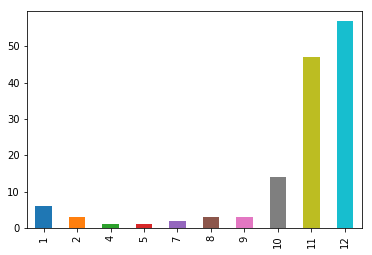

In [115]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

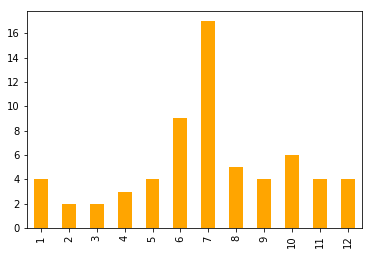

In [116]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar', color= 'orange')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

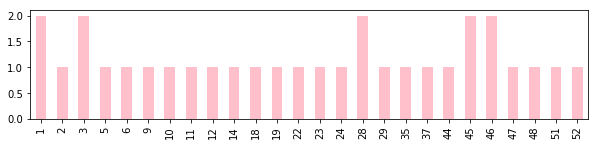

In [117]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar', color = 'pink', figsize=(10,2))

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [33]:
merge_df = pd.merge(release_dates, cast, how = 'right', on=['title', 'year'])

In [34]:
merge_df[(merge_df.name == 'Keanu Reeves') & (merge_df.n == 1) & (merge_df.country == 'USA')]

,title,year,country,date,name,type,character,n
224942,47 Ronin,2013,USA,2013-12-25,Keanu Reeves,actor,Kai,1.0
507907,A Walk in the Clouds,1995,USA,1995-08-11,Keanu Reeves,actor,Paul Sutton,1.0
1976569,Bill & Ted's Bogus Journey,1991,USA,1991-07-19,Keanu Reeves,actor,Ted,1.0
1977264,Bill & Ted's Excellent Adventure,1989,USA,1989-02-17,Keanu Reeves,actor,Ted,1.0
2822263,Chain Reaction,1996,USA,1996-08-02,Keanu Reeves,actor,Eddie Kasalivich,1.0
3251915,Constantine,2005,USA,2005-02-18,Keanu Reeves,actor,John Constantine,1.0
4911282,Feeling Minnesota,1996,USA,1996-09-13,Keanu Reeves,actor,Jjaks Clayton,1.0
6120429,Hard Ball,2001,USA,2001-09-14,Keanu Reeves,actor,Conor O'Neill,1.0
7549124,John Wick,2014,USA,2014-10-24,Keanu Reeves,actor,John Wick,1.0
7554051,John Wick: Chapter 2,2017,USA,2017-02-10,Keanu Reeves,actor,John Wick,1.0


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

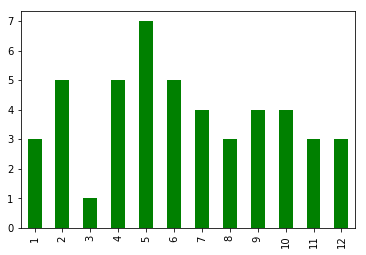

In [42]:
# kr_movies_USA contains the list of ALL the Keanu Reeves movies released in USA

kr_movies_USA = merge_df[(merge_df.name == 'Keanu Reeves') & (merge_df.country == 'USA')]
kr_movies_USA.date.dt.month.value_counts().sort_index().plot(kind='bar', color = 'green')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

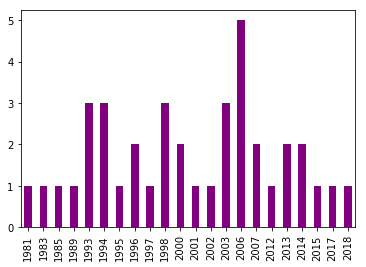

In [41]:
# years in which movies with Ian McKellen tend to be released in the USA
kr_movies_USA = merge_df[(merge_df.name == 'Ian McKellen') & (merge_df.country == 'USA')]
kr_movies_USA.date.dt.year.value_counts().sort_index().plot(kind='bar', color = 'purple')

### this is the end of the assignment